In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [125]:
def weight_vectors(a, b, N):

    if N % 2 == 0:
        print('N is even.')
    
    else:
        
        h = (b - a) / (N - 1)
        
        w_trap_list = np.ones(N)
        w_trap_list[0] = 1/2
        w_trap_list[-1] = 1/2
        
        w_trap = h * w_trap_list
        
        w_simp_list = []
        
        for i in range(N):
            if i % 2 == 0:
                w_simp_list.append(2)
            else:
                w_simp_list.append(4)
        
        w_simp_list[0] = 1
        w_simp_list[-1] = 1
        
        w_simp_list = np.array(w_simp_list)
        w_simp = (h / 3) * w_simp_list
        
    return w_trap, w_simp

In [126]:
print('Trapezoid weight vectors:', weight_vectors(0, 6, 7)[0])
print('Simpson weight vectors:', weight_vectors(0, 6, 7)[1])

Trapezoid weight vectors: [0.5 1.  1.  1.  1.  1.  0.5]
Simpson weight vectors: [0.33333333 1.33333333 0.66666667 1.33333333 0.66666667 1.33333333
 0.33333333]


In [127]:
print('Trapezoid weight vectors:', weight_vectors(0, 18, 7)[0])
print('Simpson weight vectors:', weight_vectors(0, 18, 7)[1])

Trapezoid weight vectors: [1.5 3.  3.  3.  3.  3.  1.5]
Simpson weight vectors: [1. 4. 2. 4. 2. 4. 1.]


In [229]:
def integrate_f(a, b, N):
    
    f = lambda x : np.exp(-x)
    w_trap, w_simp = weight_vectors(a, b, N)

    f_list = []
    n_list = np.linspace(a, b, N)
    
    for i in n_list:
        f_list.append(f(i))
    
    trap_result = np.dot(w_trap, np.array(f_list))
    simp_result = np.dot(w_simp, np.array(f_list))
    gaussian_result = integrate.quadrature(f, a, b, tol = 1e-13)
    
    return trap_result, simp_result, gaussian_result[0]

In [230]:
integrate_f(0, 1, 3)

(0.6452351901491773, 0.6323336800036626, 0.6321205588283172)

In [233]:
def error_plot(a, b):
    
    n_list = range(3, 10203, 200)
    
    err_trap = []
    err_simp = []
    err_gaus = []
    
    exact = 1 - np.exp(-1)
    
    for i in n_list:
        
        err_trap.append(np.abs((integrate_f(a, b, i)[0] - exact) / exact))
        err_simp.append(np.abs((integrate_f(a, b, i)[1] - exact) / exact))
        err_gaus.append(np.abs((integrate_f(a, b, i)[2] - exact) / exact))
    
    plt.figure(figsize=(15,7))
    plt.xlim([min(np.log(n_list)), max(np.log(n_list))])
    plt.plot(np.log(n_list), np.log(err_trap), color = 'blue', label = 'Trapezoid')
    plt.plot(np.log(n_list), np.log(err_simp), color = 'green', label = 'Simpson')
    plt.plot(np.log(n_list), np.log(err_gaus), color = 'red', label = 'Gaussian')
    plt.legend(loc = 'best')
    plt.show()

C:\Users\PC08\AppData\Local\Temp\ipykernel_11572\3042240282.py:20: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(n_list), np.log(err_simp), color = 'green', label = 'Simpson')


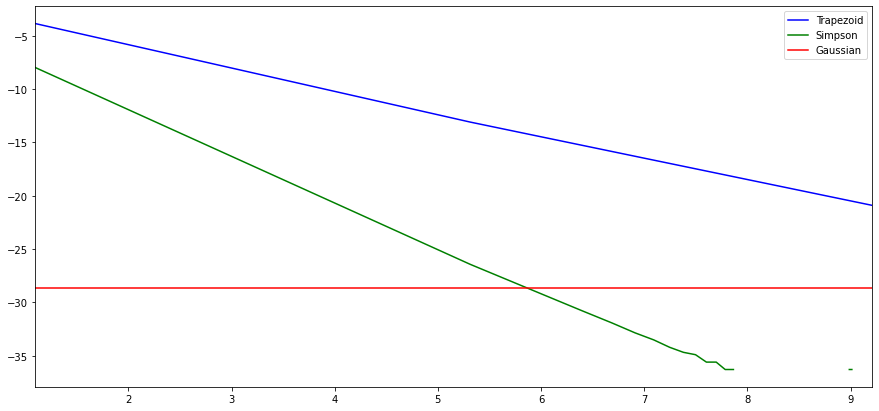

In [234]:
error_plot(0, 1)